,disease:,no disease:,total:
exposed:,233,56,289
nonexposed:,3180,1846,5026
total:,3413,1902,5315




True Relative Risk: 1.2742464799460294



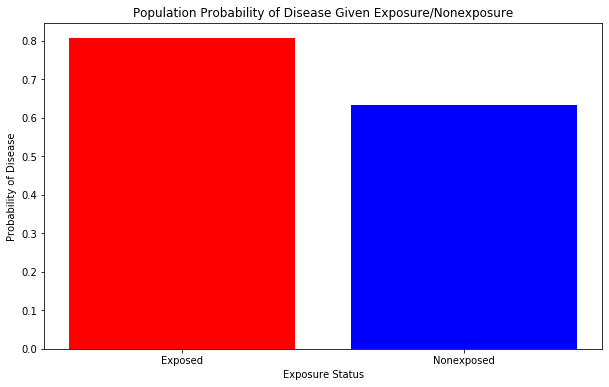

,exposed_disease,exposed_no_disease,nonexposed_disease,nonexposed_no_disease,sample size,relative_risk,log_relative_risk,var_log_relative_risk,ub_ci_log_rr,lb_ci_log_rr,weight
study number:,,,,,,,,,,,
0,15,5,147,76,243,1.137755,0.129057,0.018985,0.399118,-0.141004,52.672933
1,33,3,320,181,537,1.435156,0.361274,0.003654,0.479756,0.242791,273.654373
2,21,7,293,179,500,1.208191,0.189124,0.013199,0.414303,-0.036055,75.762815
3,11,2,89,58,160,1.397580,0.334742,0.018419,0.600748,0.068736,54.291033
4,19,3,264,165,451,1.403409,0.338904,0.008634,0.521025,0.156783,115.822380
5,15,7,282,163,467,1.075919,0.073175,0.022511,0.367247,-0.220897,44.422668
6,24,7,377,243,651,1.273210,0.241541,0.010448,0.441885,0.041197,95.710093
7,23,6,274,169,472,1.282280,0.248640,0.010388,0.448404,0.048876,96.266766
8,27,7,364,213,611,1.258807,0.230165,0.008639,0.412344,0.047986,115.748473


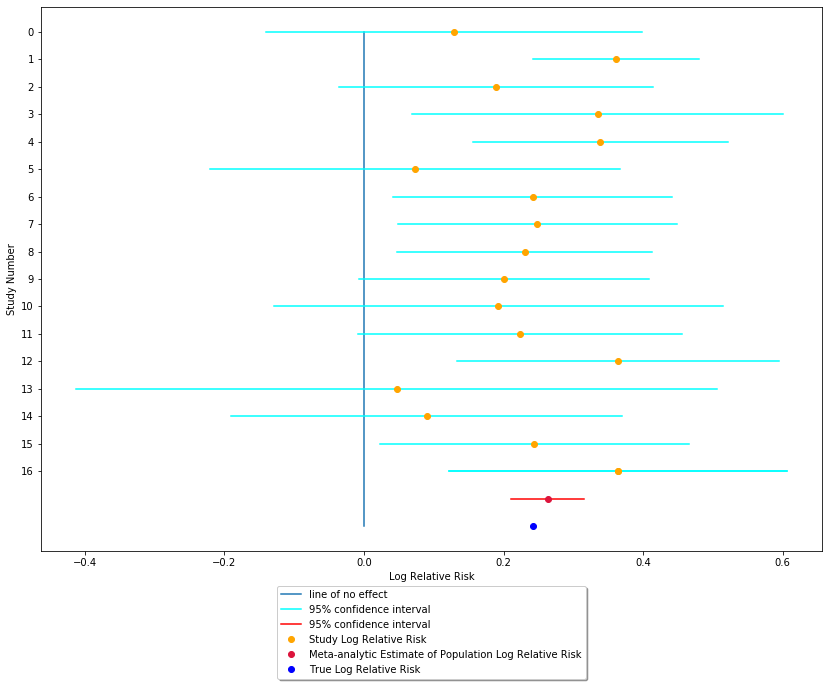

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('mode.chained_assignment', None)

# generating the population 

population = np.array([])

population_size = np.random.randint(1000,10000)

p_exposed = np.random.uniform(high =0.3)

exposure_danger = np.random.uniform(low =0.2)

disease_general = np.random.uniform(high = exposure_danger)


for i in np.arange(population_size):
    exposed_or_not = np.random.choice(['exposed','nonexposed'], p = [p_exposed, 1-p_exposed])
    if exposed_or_not == 'exposed':
        population = np.append(population, np.random.choice(['exposed_disease','exposed_no_disease'], 
                                           p=[exposure_danger,1-exposure_danger]))
    if exposed_or_not == 'nonexposed':
        population = np.append(population, np.random.choice(['nonexposed_disease','nonexposed_no_disease'],
                          p=[disease_general,1-disease_general]))

        

# creating the counts

population_n = len(population)

nonexposed_no_disease = np.count_nonzero(population == 'nonexposed_no_disease')

nonexposed_disease = np.count_nonzero(population == 'nonexposed_disease')

number_nonexposed = nonexposed_no_disease + nonexposed_disease

exposed_no_disease = np.count_nonzero(population == 'exposed_no_disease')

exposed_disease = np.count_nonzero(population == 'exposed_disease')

number_exposed = exposed_no_disease + exposed_disease

total_disease = nonexposed_disease + exposed_disease

df_pop = pd.DataFrame(index = ['exposed:','nonexposed:', 'total:'], columns = ['disease:','no disease:', 'total:'])

if df_pop.iloc[0,0] == 0:
    df_pop.iloc[0,0] == 0.5
    
if df_pop.iloc[0,1] == 0:
    df_pop.iloc[0,0] == 0.5

if df_pop.iloc[1,0] == 0:
    df_pop.iloc[0,0] == 0.5
    
if df_pop.iloc[1,1] == 0:
    df_pop.iloc[0,0] == 0.5
    

df_pop.iloc[0,0] = exposed_disease
df_pop.iloc[0,1] = exposed_no_disease
df_pop.iloc[0,2]  = exposed_disease + exposed_no_disease
df_pop.iloc[1,0] = nonexposed_disease
df_pop.iloc[1,1] = nonexposed_no_disease
df_pop.iloc[1,2] = nonexposed_disease + nonexposed_no_disease
df_pop.iloc[2,0] = exposed_disease + nonexposed_disease
df_pop.iloc[2,1] = exposed_no_disease + nonexposed_no_disease 
df_pop.iloc[2,2] = population_n

display(df_pop)
print()


# calculating the population effect sizes

prob_disease_giv_exposure = exposed_disease/(exposed_no_disease + exposed_disease)

prob_disease_giv_nonexposure = nonexposed_disease/(nonexposed_no_disease + nonexposed_disease)

true_relative_risk = prob_disease_giv_exposure/prob_disease_giv_nonexposure

true_log_relative_risk = np.log(true_relative_risk)

    
print()
print('True Relative Risk:', true_relative_risk)
print()


plt.figure(figsize = (10,6))
plt.bar(x = ['Exposed', 'Nonexposed'], height = [prob_disease_giv_exposure, prob_disease_giv_nonexposure]
       , color = ['red', 'blue'])
plt.xlabel('Exposure Status')
plt.ylabel('Probability of Disease')
plt.title('Population Probability of Disease Given Exposure/Nonexposure')
plt.show()



# simulating the studies

no_of_studies = np.random.randint(5,40)

studies = []

for i in np.arange(no_of_studies):
    sample_size = np.random.randint(10,800)
    study = np.random.choice(population, size = sample_size, replace = False)
    studies.append(study)
    
counts = np.array([])


# creating a dataframe for the study counts

df = pd.DataFrame(columns = ['exposed_disease', 'exposed_no_disease',
                                             'nonexposed_disease','nonexposed_no_disease'])


counter=1

for i in studies:
    temp_exposed_disease = np.count_nonzero(i == 'exposed_disease')
    temp_exposed_no_disease = np.count_nonzero(i == 'exposed_no_disease')
    temp_nonexposed_disease = np.count_nonzero(i == 'nonexposed_disease')
    temp_nonexposed_no_disease = np.count_nonzero(i == 'nonexposed_no_disease')
    study = [temp_exposed_disease,temp_exposed_no_disease,temp_nonexposed_disease,temp_nonexposed_no_disease]
    
    for i in np.arange(len(study)):
        if study[i] == 0:
            study[i] = 0.5
   
    df = df.append(pd.Series(study, index = ['exposed_disease', 'exposed_no_disease',
                                             'nonexposed_disease','nonexposed_no_disease']), ignore_index = True)
    counter = counter + 1
 
    
counter = 0
df['sample size'] = 0
for i in np.arange(len(df)):
    df['sample size'][counter]= df['exposed_disease'][counter]+df['exposed_no_disease'][counter]+df['nonexposed_disease'][counter]+df['nonexposed_no_disease'][counter]
    counter = counter+1
    
df.index.name = 'study number:'



# calculating the relative risk for each study

counter= 0
df['relative_risk'] = 0.0


for i in np.arange(len(df)):
    df['relative_risk'][counter] = (df['exposed_disease'][counter]/(df['exposed_no_disease'][counter] + df['exposed_disease'][counter]))/(df['nonexposed_disease'][counter]/(df['nonexposed_no_disease'][counter] + df['nonexposed_disease'][counter]))
    counter = counter+1
    
# calculating the log relative risk for each study

counter= 0
df['log_relative_risk'] = 0.0


for i in np.arange(len(df)):
    df['log_relative_risk'][counter] = np.log(df['relative_risk'][counter])
    counter = counter+1

    
# calculating standard error for the odds ratio

SE_log_relative_risk = np.array([])
var_log_relative_risk = np.array([])


counter = 0
for i in np.arange(len(df)):
    n1 = df['exposed_disease'][counter] + df['exposed_no_disease'][counter]
    n2 = df['nonexposed_disease'][counter] + df['nonexposed_no_disease'][counter] 
    temp_var_log_relative_risk = 1/df['exposed_disease'][counter] - 1/n1 + 1/df['nonexposed_disease'][counter] - 1/n2                         
    temp_se_log_relative_risk = np.sqrt(temp_var_log_relative_risk)
    SE_log_relative_risk = np.append(SE_log_relative_risk, temp_se_log_relative_risk)
    var_log_relative_risk = np.append(var_log_relative_risk,temp_var_log_relative_risk)
    counter = counter+1

df['var_log_relative_risk'] = 0.0
df['ub_ci_log_rr'] = 0.0
df['lb_ci_log_rr'] = 0.0
df['weight'] = 0.0


counter = 0 
for i in np.arange(len(df)):
    
    df['var_log_relative_risk'][counter] = var_log_relative_risk[counter]
    df['ub_ci_log_rr'][counter] = df['log_relative_risk'][counter] + 1.96 * SE_log_relative_risk[counter]
    df['lb_ci_log_rr'][counter] = df['log_relative_risk'][counter] - 1.96 * SE_log_relative_risk[counter]
    df['weight'][counter] = 1/var_log_relative_risk[counter]
 
    counter = counter + 1
    
display(df)


# creating a forest plot of relative risks for each study


y = []
zeros = []
for i in np.arange(len(df.index)+2):
    y.append(i)
    zeros.append(0)
    

study_list = list(df.index)



plt.figure(figsize = (14,10))   
plt.plot(zeros,y, label = 'line of no effect')
plt.xlabel('Log Relative Risk')
plt.ylabel('Study Number')

plt.yticks(study_list)
plt.gca().invert_yaxis()


counter = 0
for i in np.arange(len(df)):
    xs = np.linspace(df['lb_ci_log_rr'][counter],df['ub_ci_log_rr'][counter])
    ys = []
    for i in xs:
        ys.append(study_list[counter])
    plt.plot(xs, ys, color = 'cyan')
 
    counter = counter + 1
    
plt.plot(xs, ys, color = 'cyan', label = '95% confidence interval')
    

counter = 0
for i in np.arange(len(df)):
    plt.plot(df['log_relative_risk'][counter], counter, 'o', color = 'orange')
    counter = counter + 1
    
# calculating the fixed effect meta-analysis statistics

effect_sizes = df['log_relative_risk']
weights = df['weight']
sum_of_weights = np.sum(weights)

effect_size_times_weight = []

counter = 0
for i in np.arange(len(effect_sizes)):
    effect_size_times_weight.append(effect_sizes[counter]*weights[counter])
    counter = counter+1

sum_effect_size_times_weight = np.sum(effect_size_times_weight)

weighted_mean = sum_effect_size_times_weight/sum_of_weights
var_weighted_mean = 1/sum_of_weights
se_weighted_mean = np.sqrt(var_weighted_mean)

ub_ci_wm = weighted_mean + 1.96 * se_weighted_mean
lb_ci_wm = weighted_mean - 1.96 * se_weighted_mean    

ci_line = np.linspace(lb_ci_wm,ub_ci_wm)

ci_ys = []
for i in np.arange(len(ci_line)):
    ci_ys.append(max(study_list)+1)
    
plt.plot(ci_line,ci_ys, color = 'red', label = '95% confidence interval')
plt.plot(df['log_relative_risk'][len(df['log_relative_risk'])-1], len(df['log_relative_risk'])-1, 'o', color = 'orange', label = 'Study Log Relative Risk')
plt.plot(weighted_mean,max(study_list)+1, 'o', color = 'crimson', label = 'Meta-analytic Estimate of Population Log Relative Risk')

plt.plot(true_log_relative_risk,max(df.index)+2, 'o', color = 'blue', label = 'True Log Relative Risk')

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
    
ax = plt.subplot()
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=1)
plt.show()

    
plt.show()